In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import nltk
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
videos_stats = pd.read_csv("videos-stats.csv")
comments = pd.read_csv("comments.csv")

In [3]:
videos_stats.drop_duplicates(subset='Video ID', ignore_index=True, inplace=True)


videos_stats.drop(columns="Unnamed: 0", inplace=True)
comments.drop(columns="Unnamed: 0", inplace=True)

In [4]:
comments.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
comments=comments.drop(columns=['Likes'])

In [6]:
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [7]:
##这一部分挪到后面我一起讲了吧

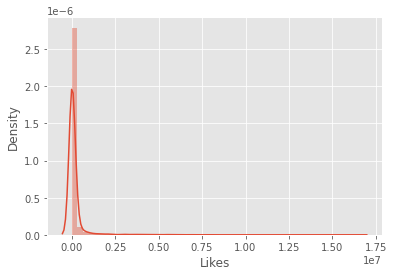

In [8]:
sns.distplot(videos_stats['Likes'])
plt.show()

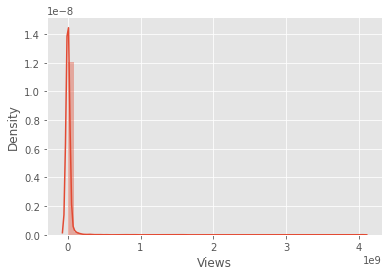

In [9]:
sns.distplot(videos_stats['Views'])
plt.show()

In [10]:
##删除无效数据

In [11]:
comments=pd.merge(comments,videos_stats,on='Video ID')

In [12]:
comments=comments.dropna()

In [13]:
comments=comments.sample(len(comments))

In [14]:
comments.isnull().sum()

Video ID        0
Comment         0
Sentiment       0
Title           0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

In [15]:
comments.dropna(inplace=True)

In [16]:
##四分位法去除极端数据（这部分也我讲吧）

In [17]:
Q1=comments.quantile(0.25)
Q3=comments.quantile(0.75)

In [18]:
IQR=Q3-Q1
comments=comments[~((comments<(Q1-1.5*IQR))|(comments>(Q3+1.5*IQR))).any(axis=1)]

In [19]:
comments=comments[comments['Likes']>0]

In [20]:
comments=comments[comments['Views']>0]

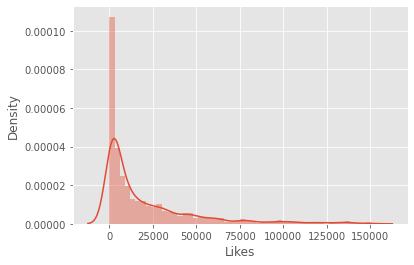

In [21]:
sns.distplot(comments['Likes'])
plt.show()

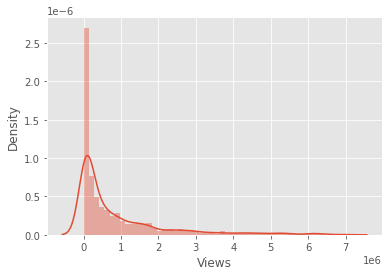

In [22]:
sns.distplot(comments['Views'])
plt.show()

In [23]:
##Text processing（nltk去掉stopwords，用空格分隔

In [24]:
labels = np.array(comments['Sentiment'])
comment = list(comments['Comment'])

In [25]:
def filter_stopwords(sentences):
    filtered_sentences = []
    stopwords = nltk.corpus.stopwords.words('english')
    for s in sentences:
        filtered_sentence = [w for w in s.split() if w not in stopwords]
        filtered_sentences.append(' '.join(filtered_sentence))
    return filtered_sentences

In [26]:
comment = filter_stopwords(comment)

In [27]:
##建立训练集和测试集

In [28]:
##选择前10000个数据为训练集

In [29]:
n=10000

In [30]:
comment_test=comments.iloc[n:]

In [31]:
comment_test.drop(columns="Sentiment", inplace=True)

In [32]:
##建立训练集

In [33]:
X_train, X_test, Y_train, Y_test = comment[:n],comment[n:],labels[:n],labels[n:]

In [34]:
##将text转化为tfid矩阵

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer()
tf_train_data = tfidf_transformer.fit_transform(X_train)
tf_docs_new = tfidf_transformer.transform(X_test)

In [36]:
tf_train_data

<10000x26239 sparse matrix of type '<class 'numpy.float64'>'
	with 186008 stored elements in Compressed Sparse Row format>

In [37]:
##随机森林训练数据

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

In [39]:
clf.fit(tf_train_data, Y_train)

MLPClassifier()

In [40]:
comment_test

,Video ID,Comment,Title,Published At,Keyword,Likes,Comments,Views
17884,0jTI8UfcY1M,"I’ve always wanted to make a game, and I’ve co...",Game development is hard | Indie Game Devlog,2022-08-13,game development,25476.0,1892.0,512978.0
5762,dCPHGwW9SOk,I would expect Spot to have this kind on versa...,Google’s Most Advanced Robot Brain Just Got a ...,2022-08-21,google,3823.0,444.0,212395.0
949,UZFeOxoRe8g,anh làm clip tấu hài là chính hay lắm.Chúc anh...,Farming Simulator 22 #13 - Khi Xe Bán Tải Chở ...,2022-08-24,gaming,2501.0,193.0,84565.0
659,MSTmUJU48g4,21% making 💵\n74% struggling,Americans Are Angry And Worried About U.S. Fut...,2022-08-21,news,510.0,560.0,34715.0
250,IHnhSxizVOA,The price of todays bikes is absolutely bonker...,Battle Of The Tech - Super Bike Vs World Super...,2022-07-31,tech,1289.0,183.0,35948.0
...,...,...,...,...,...,...,...,...
14033,xvWdIi6_fGg,The best part about his style of teaching is t...,Cell Biology | DNA Replication 🧬,2021-03-29,biology,13733.0,626.0,489332.0
9314,6jgiqyw6E3o,Huge thank you to Ali for making this trip pos...,Cooking Entire YAK!! Pakistani Mountain Food i...,2022-07-10,food,44713.0,2725.0,1186255.0
5311,zDiC8KexSRM,Phone are no longer compared by speed but by t...,Elon Musk&#39;s ALL NEW Phone Just DESTROYED A...,2022-08-02,apple,3908.0,61.0,174482.0
7596,GlsFxbhWOS8,hey tanqr love the content tanqr Keep it Up!,I built a FAKE Bed Defense in Roblox Bedwars..,2021-06-27,bed,135484.0,4557.0,5301271.0


In [41]:
acc=clf.score(tf_docs_new,Y_test)

In [42]:
##精准度为

In [43]:
print(acc)

0.7370651204281892


In [44]:
ypre=clf.predict(tf_docs_new)

In [45]:
comment_test['Sentiment']=ypre

In [46]:
comment_test

,Video ID,Comment,Title,Published At,Keyword,Likes,Comments,Views,Sentiment
17884,0jTI8UfcY1M,"I’ve always wanted to make a game, and I’ve co...",Game development is hard | Indie Game Devlog,2022-08-13,game development,25476.0,1892.0,512978.0,2.0
5762,dCPHGwW9SOk,I would expect Spot to have this kind on versa...,Google’s Most Advanced Robot Brain Just Got a ...,2022-08-21,google,3823.0,444.0,212395.0,1.0
949,UZFeOxoRe8g,anh làm clip tấu hài là chính hay lắm.Chúc anh...,Farming Simulator 22 #13 - Khi Xe Bán Tải Chở ...,2022-08-24,gaming,2501.0,193.0,84565.0,1.0
659,MSTmUJU48g4,21% making 💵\n74% struggling,Americans Are Angry And Worried About U.S. Fut...,2022-08-21,news,510.0,560.0,34715.0,0.0
250,IHnhSxizVOA,The price of todays bikes is absolutely bonker...,Battle Of The Tech - Super Bike Vs World Super...,2022-07-31,tech,1289.0,183.0,35948.0,1.0
...,...,...,...,...,...,...,...,...,...
14033,xvWdIi6_fGg,The best part about his style of teaching is t...,Cell Biology | DNA Replication 🧬,2021-03-29,biology,13733.0,626.0,489332.0,1.0
9314,6jgiqyw6E3o,Huge thank you to Ali for making this trip pos...,Cooking Entire YAK!! Pakistani Mountain Food i...,2022-07-10,food,44713.0,2725.0,1186255.0,2.0
5311,zDiC8KexSRM,Phone are no longer compared by speed but by t...,Elon Musk&#39;s ALL NEW Phone Just DESTROYED A...,2022-08-02,apple,3908.0,61.0,174482.0,1.0
7596,GlsFxbhWOS8,hey tanqr love the content tanqr Keep it Up!,I built a FAKE Bed Defense in Roblox Bedwars..,2021-06-27,bed,135484.0,4557.0,5301271.0,2.0


In [47]:
res=comment_test.groupby('Video ID')['Likes','Views','Sentiment'].agg(['mean'])

In [48]:
res

,Likes,Views,Sentiment
,mean,mean,mean
Video ID,,,
--hxd1CrOqg,6379.0,808787.0,0.000000
--ixiTypG8g,1029.0,97434.0,0.750000
-6IgkG5yZfo,10959.0,844015.0,2.000000
-7hzaGya86g,18957.0,702174.0,1.333333
-8TnsjDRXUE,3232.0,188875.0,2.000000
...,...,...,...
zg9ih6SVACc,22667.0,939411.0,1.333333
zhUnEg0he4A,39868.0,2797148.0,1.500000


In [49]:
res.corr()

,,Likes,Views,Sentiment
,,mean,mean,mean
Likes,mean,1.000000,0.783318,0.071506
Views,mean,0.783318,1.000000,0.065336
Sentiment,mean,0.071506,0.065336,1.000000


In [50]:
res.columns=['Likes','Views','Sentiment']

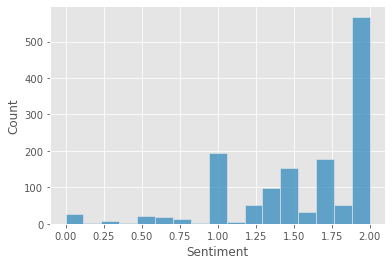

In [51]:
sns.histplot(res['Sentiment'])
plt.show()

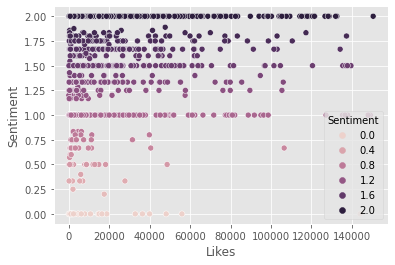

In [52]:
sns.scatterplot(data=res,x='Likes',y='Sentiment',hue='Sentiment')
plt.show()

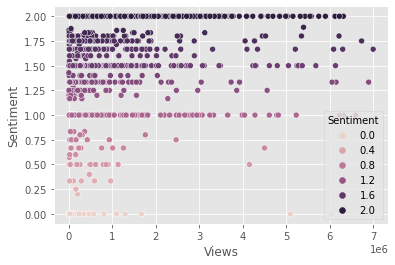

In [53]:
sns.scatterplot(data=res,x='Views',y='Sentiment',hue='Sentiment')
plt.show()

In [54]:
res

,Likes,Views,Sentiment
Video ID,,,
--hxd1CrOqg,6379.0,808787.0,0.000000
--ixiTypG8g,1029.0,97434.0,0.750000
-6IgkG5yZfo,10959.0,844015.0,2.000000
-7hzaGya86g,18957.0,702174.0,1.333333
-8TnsjDRXUE,3232.0,188875.0,2.000000
...,...,...,...
zg9ih6SVACc,22667.0,939411.0,1.333333
zhUnEg0he4A,39868.0,2797148.0,1.500000
zukfAqA_X4U,10725.0,155562.0,2.000000


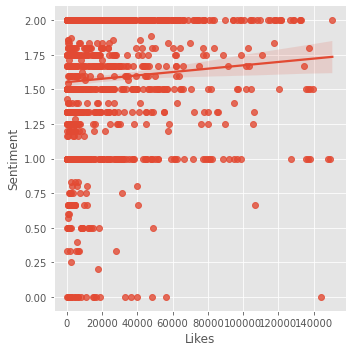

In [55]:
sns.lmplot(data=res,x='Likes',y='Sentiment')

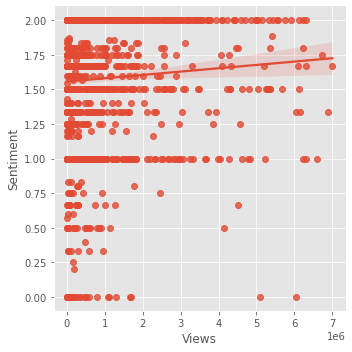

In [56]:
sns.lmplot(data=res,x='Views',y='Sentiment')

In [57]:
res.reset_index(inplace=True)
res['like_ratio'] = 1000 * (videos_stats['Likes'] / videos_stats['Views'])

<AxesSubplot:xlabel='Sentiment', ylabel='like_ratio'>

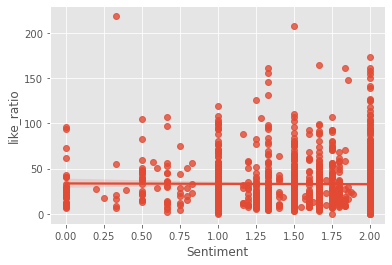

In [58]:
sns.regplot(data=res, x='Sentiment', y='like_ratio')

In [59]:
res

,Video ID,Likes,Views,Sentiment,like_ratio
0,--hxd1CrOqg,6379.0,808787.0,0.000000,25.123145
1,--ixiTypG8g,1029.0,97434.0,0.750000,43.672496
2,-6IgkG5yZfo,10959.0,844015.0,2.000000,40.808641
3,-7hzaGya86g,18957.0,702174.0,1.333333,77.543184
4,-8TnsjDRXUE,3232.0,188875.0,2.000000,52.010515
...,...,...,...,...,...
1420,zg9ih6SVACc,22667.0,939411.0,1.333333,26.965213
1421,zhUnEg0he4A,39868.0,2797148.0,1.500000,10.072024
1422,zukfAqA_X4U,10725.0,155562.0,2.000000,16.705893
1423,zvS8Fmxv1_U,1167.0,235019.0,1.000000,46.847556


In [60]:
res.corr()

,Likes,Views,Sentiment,like_ratio
Likes,1.000000,0.783318,0.071506,-0.010346
Views,0.783318,1.000000,0.065336,0.000050
Sentiment,0.071506,0.065336,1.000000,-0.007493
like_ratio,-0.010346,0.000050,-0.007493,1.000000
